# **Set Up Environment**

In [ ]:
!apt-get update && apt-get install -y --no-install-recommends \
        build-essential \
        git \
        libgl1-mesa-glx \
        libegl1-mesa \
        libxrandr2 \
        libxrandr2 \
        libxss1 \
        libxcursor1 \
        libxcomposite1 \
        libasound2 \
        libxi6 \
        libxtst6 \
        libxinerama1 \
        libxkbcommon-x11-0 \
        libfontconfig1 \
        libnss3 \
        libegl1-mesa \
        libgles2-mesa \
        libglib2.0-0 \
        libx11-xcb1 \
        libxcb-icccm4 \
        libxcb-image0 \
        libxcb-keysyms1 \
        libxcb-randr0 \
        libxcb-render-util0 \
        libxcb-xinerama0 \
        libxcb-xkb1 \
        libxkbcommon-x11-0 \
        libxcb-xinput0 \
        wget \
        unzip \
        curl

In [ ]:
!apt-get update
!apt-get install -y --no-install-recommends \
    build-essential \
    curl \
    git \
    libgl1-mesa-glx \
    libegl1-mesa \
    libxrandr2 \
    libxss1 \
    libxcursor1 \
    libxcomposite1 \
    libasound2 \
    libxi6 \
    libxtst6 \
    libxinerama1 \
    libxkbcommon-x11-0 \
    libfontconfig1 \
    libnss3 \
    libegl1-mesa \
    libgles2-mesa \
    libglib2.0-0 \
    libx11-xcb1 \
    libxcb-icccm4 \
    libxcb-image0 \
    libxcb-keysyms1 \
    libxcb-randr0 \
    libxcb-render-util0 \
    libxcb-xinerama0 \
    libxcb-xkb1 \
    libxkbcommon-x11-0 \
    libxcb-xinput0 \
    wget \
    unzip
!curl -O https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.4.1/local_installers/cuda-repo-ubuntu1804-11-4-local_11.4.1-470.57.02-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-11-4-local_11.4.1-470.57.02-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu1804-11-4-local/7fa2af80.pub
!apt-get update
!apt-get -y install cuda

In [ ]:
!wget https://gist.githubusercontent.com/JayeFu/62efbb93b42c34fd041e863d5f6fd6ad/raw/70c81d1180b3e4a178466762bb887e813037d1de/01install_conda.sh -O /content/01install_conda.sh
!bash /content/01install_conda.sh

In [ ]:
!echo "DOWNLOAD HABITAT-SIM"
!gdown 1p8WNJCkCTcYCdxmuScFz4EP3Ht1p74hK
!unzip habitat-sim.zip -d /content/
##Install Habitat-Sim
!conda config --set pip_interop_enabled True

!echo "INISTALL HABITAT-SIM"
!cd /content/habitat-sim/; pip install -r requirements.txt; python setup.py build_ext --parallel 8 install --headless

In [ ]:
!git config --global user.email "luca.zunino@epfl.ch"
!git config --global user.name "lzunino"

In [ ]:
!gdown --id 1MUKNkCkRbzCM5SEBPY7nreR-Ch6f5e9b -O /content/03install_habitat-lab.sh -O /content/03install_habitat-lab.sh
!bash /content/03install_habitat-lab.sh

In [ ]:
!wget https://gist.githubusercontent.com/JayeFu/62efbb93b42c34fd041e863d5f6fd6ad/raw/70c81d1180b3e4a178466762bb887e813037d1de/04install_misc.sh -O /content/04install_misc.sh
!bash /content/04install_misc.sh

In [ ]:
!pip install transformers omegaconf

In [ ]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip install torch_geometric_temporal

# **Needed Imports**

In [ ]:
import sys
sys.path.insert(0, '/usr/local/lib/python3.9/site-packages/habitat_sim-0.2.3-py3.9-linux-x86_64.egg')
sys.path.insert(0, '/usr/local/lib/python3.9/site-packages')
sys.path.insert(0, '/content/habitat-lab/habitat-lab/')

In [5]:
import seaborn as sns
import matplotlib
matplotlib.rcParams["figure.dpi"] = 100
sns.set_style("whitegrid")

In [ ]:
import random

from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

import habitat_sim

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import random

import numpy as np
from omegaconf import OmegaConf
import torch
import torch.nn.functional as F

from habitat_baselines.config.default import get_config
from habitat_baselines.rl.ppo.ppo_trainer import PPOTrainer 
from habitat_baselines.rl.ppo.policy import PointNavBaselinePolicy

# **Install Scene Data**

In [ ]:
!gdown 1EZ-99Mx30YrtJrlwSLXLegb3i9OFrA6R
!gdown 1JdbQ86NePrE_baxOjZvVuO8tVmzUXxSu
!gdown 1kcl6GDvk2QXgmnrcOGeRgafoMMro4vLI

!unzip /content/data.zip -d /content/
!unzip /content/pg.zip -d /content/
!unzip /content/images.zip -d /content/

# **Training Cell**

In [ ]:
# A function to build configuration for PPO training
def build_PPO_config():
    config = get_config("/content/habitat-lab/habitat-baselines/habitat_baselines/config/pointnav/ppo_pointnav.yaml")
    # Change for REINFORCE
    OmegaConf.set_readonly(config, False)
    config.habitat_baselines.tensorboard_dir = "tb/GCNConv"
    config.habitat_baselines.num_updates = -1
    config.habitat_baselines.num_environments = 2
    config.habitat_baselines.verbose = False
    config.habitat_baselines.num_checkpoints = -1
    config.habitat_baselines.checkpoint_interval = 10000
    config.habitat_baselines.total_num_steps = 100 * 1000
    config.habitat_baselines.force_blind_policy = False
    config.habitat.dataset.data_path="data/datasets/pointnav/simple_room/v0/{split}/empty_room.json.gz"
    OmegaConf.set_readonly(config, True)
    return config

config = build_PPO_config()  # Build the config for PPO

# Set randomness
random.seed(config.habitat.seed)
np.random.seed(config.habitat.seed)
torch.manual_seed(config.habitat.seed)
if (
    config.habitat_baselines.force_torch_single_threaded
    and torch.cuda.is_available()
):
    torch.set_num_threads(1)

import os
os.environ["MAGNUM_LOG"] = "quiet"
os.environ["HABITAT_SIM_LOG"] = "quiet"

# Build the trainer and start training
trainer = PPOTrainer(config)


trainer.train()

# **EXPERIMENT PLOTS**

In [8]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd


def parse_tensorboard(path, scalars, prefix=""):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _ = ea.Reload()
    df = pd.DataFrame(ea.Scalars(scalars[0]))
    df[f'{scalars[0]}'] = df['value']
    df.drop(columns=['value'], inplace=True)
    for k in scalars:
        df[k] = pd.DataFrame(ea.Scalars(k))['value']
    return df

### **GCNConv vs. GConvGRU**

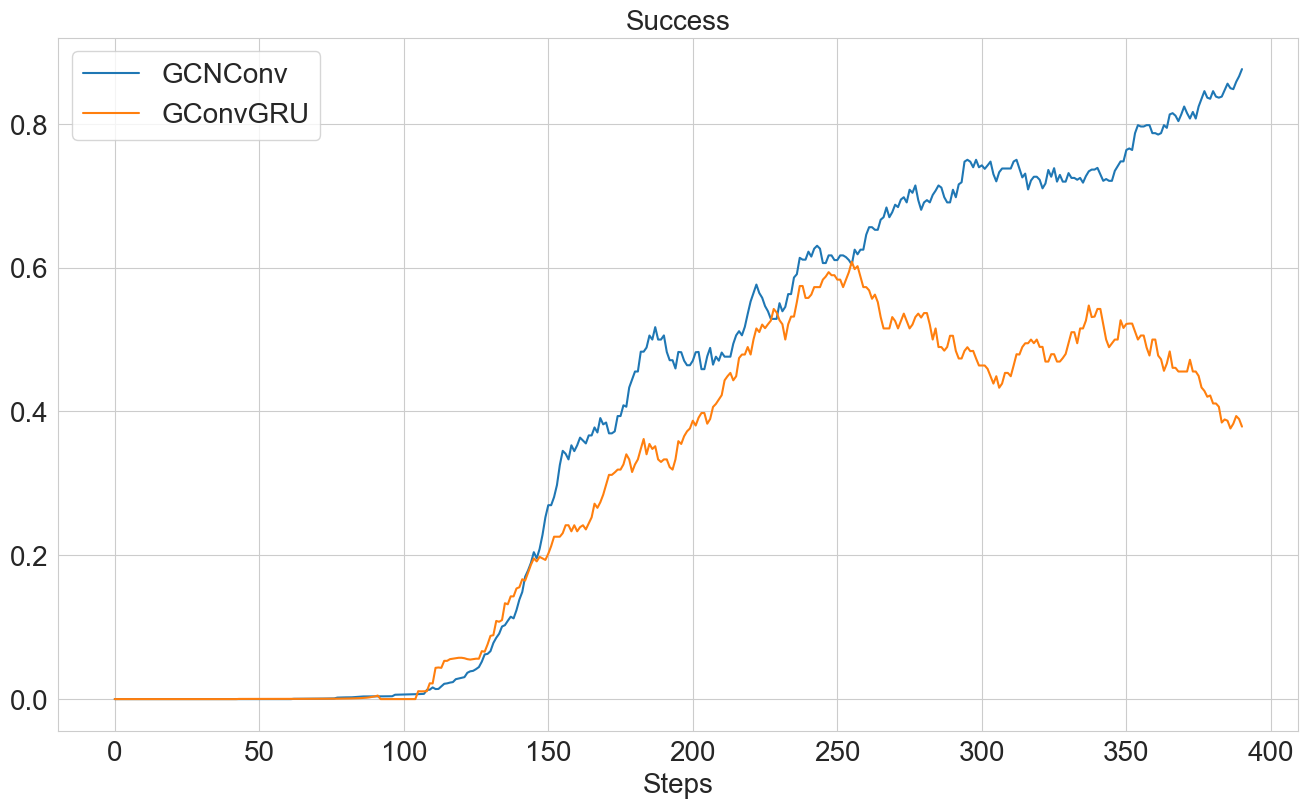

In [9]:
import matplotlib.pyplot as plt

ppo_logs_1 = parse_tensorboard("experiment_tensorboards/gcn_conv_512_256_128_64_no_dropout/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])
ppo_logs_2 = parse_tensorboard("experiment_tensorboards/GConvGRU/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])

plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/success'])
plt.plot(ppo_logs_2['metrics/success'])

plt.title("Success", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['GCNConv', 'GConvGRU'], fontsize=20)

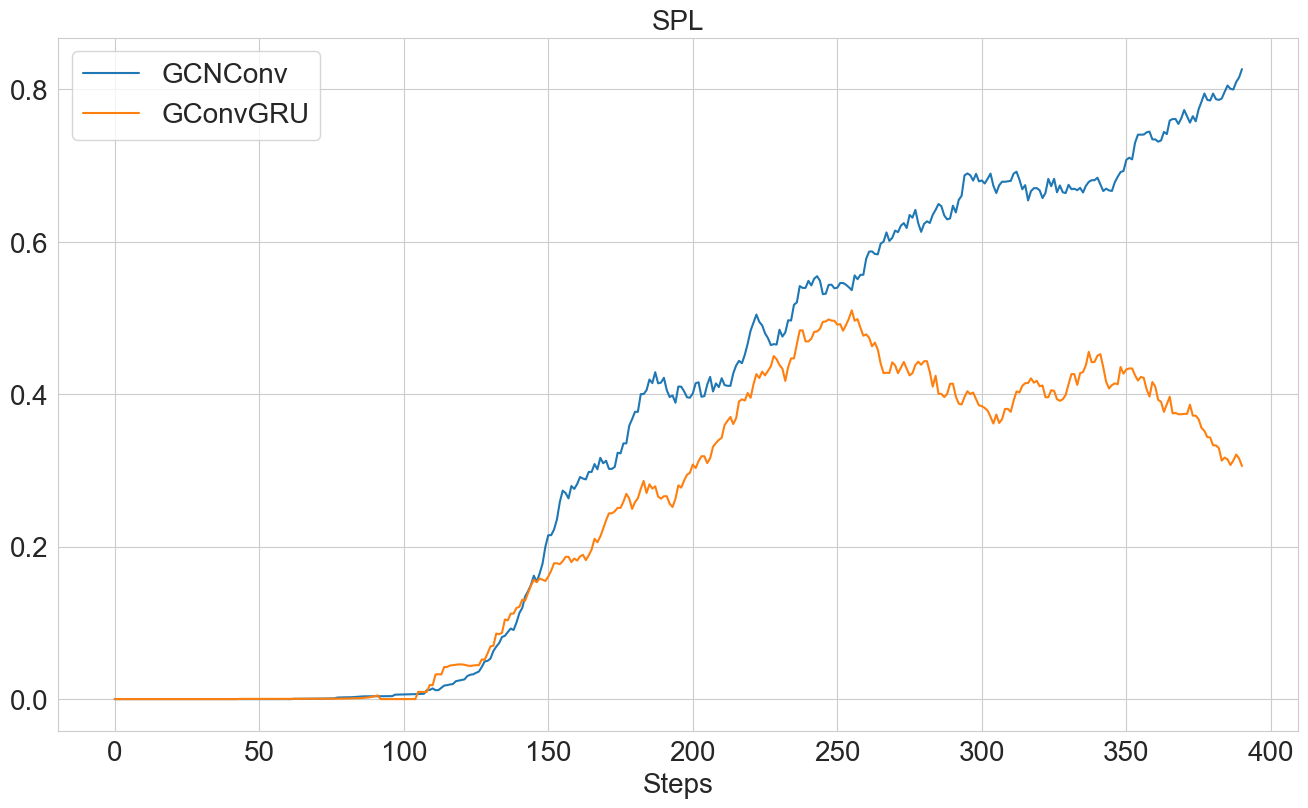

In [11]:
plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/spl'])
plt.plot(ppo_logs_2['metrics/spl'])

plt.title("SPL", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['GCNConv', 'GConvGRU'], fontsize=20)

### **40 vs 128 Nodes**

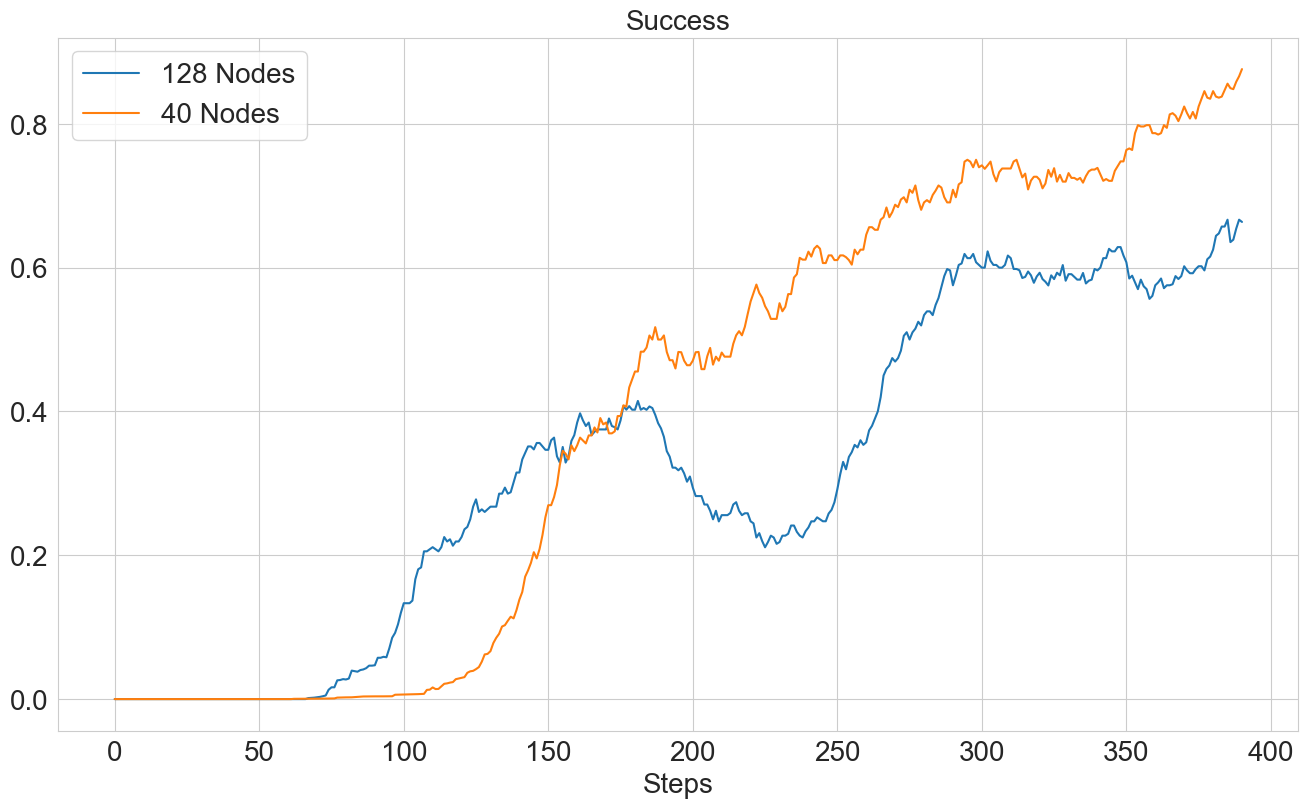

In [12]:
import matplotlib.pyplot as plt

ppo_logs_1 = parse_tensorboard("experiment_tensorboards/128_nodes/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])
ppo_logs_2 = parse_tensorboard("experiment_tensorboards/gcn_conv_512_256_128_64_no_dropout/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])

plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/success'])
plt.plot(ppo_logs_2['metrics/success'])

plt.title("Success", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['128 Nodes', '40 Nodes'], fontsize=20)

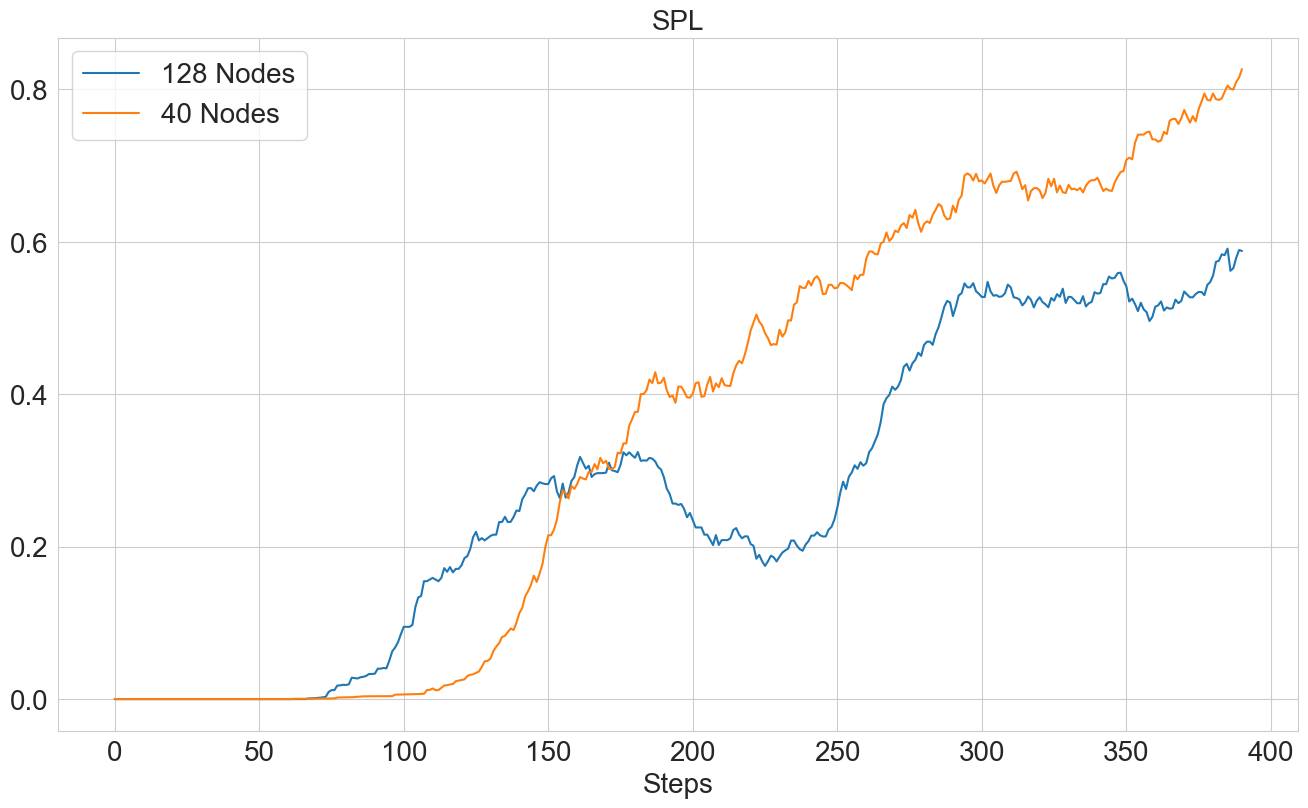

In [13]:
plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/spl'])
plt.plot(ppo_logs_2['metrics/spl'])

plt.title("SPL", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['128 Nodes', '40 Nodes'], fontsize=20)

### **RAN vs Baseline - PointGoal GPS/Compass Included - Empty Room Scene**

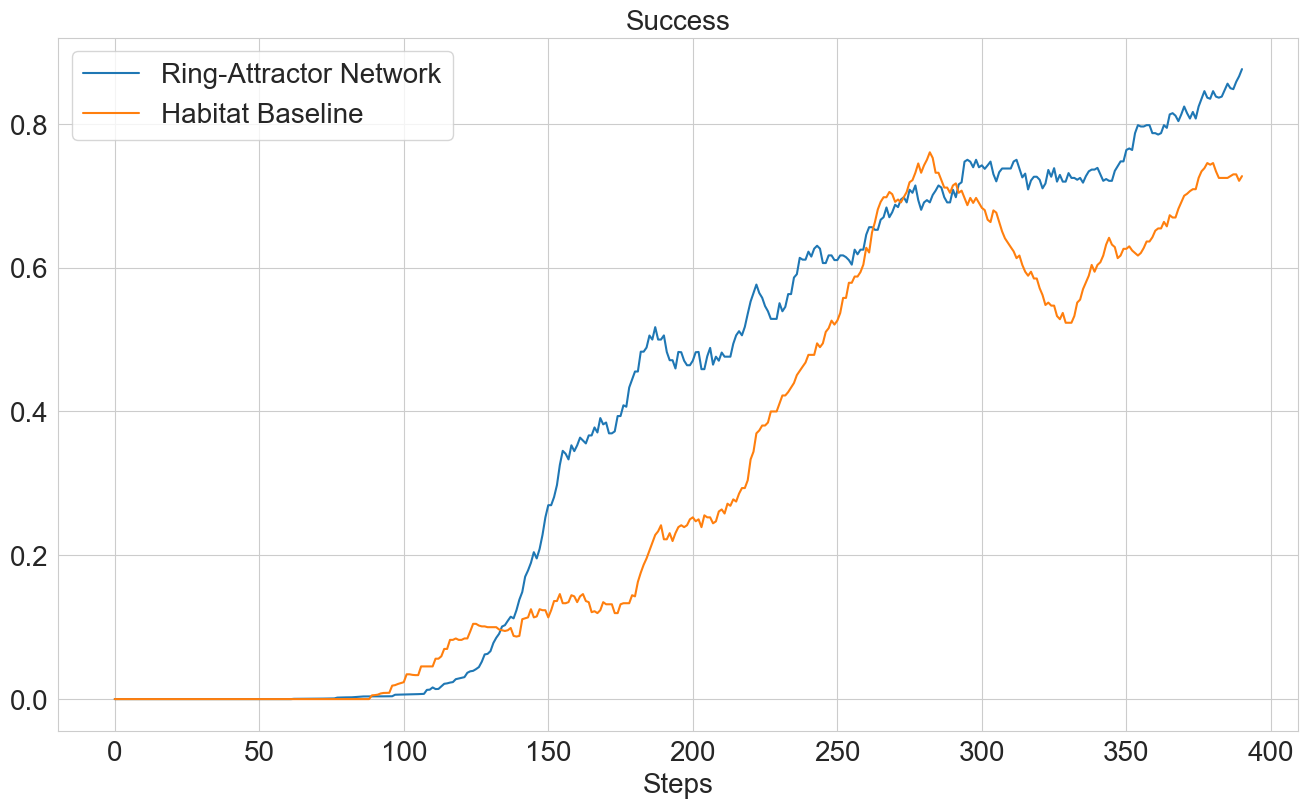

In [14]:
import matplotlib.pyplot as plt

ppo_logs_1 = parse_tensorboard("experiment_tensorboards/gcn_conv_512_256_128_64_no_dropout/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])
ppo_logs_2 = parse_tensorboard("experiment_tensorboards/baseline_resnet_gps/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])

plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/success'])
plt.plot(ppo_logs_2['metrics/success'])

plt.title("Success", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['Ring-Attractor Network', 'Habitat Baseline'], fontsize=20)

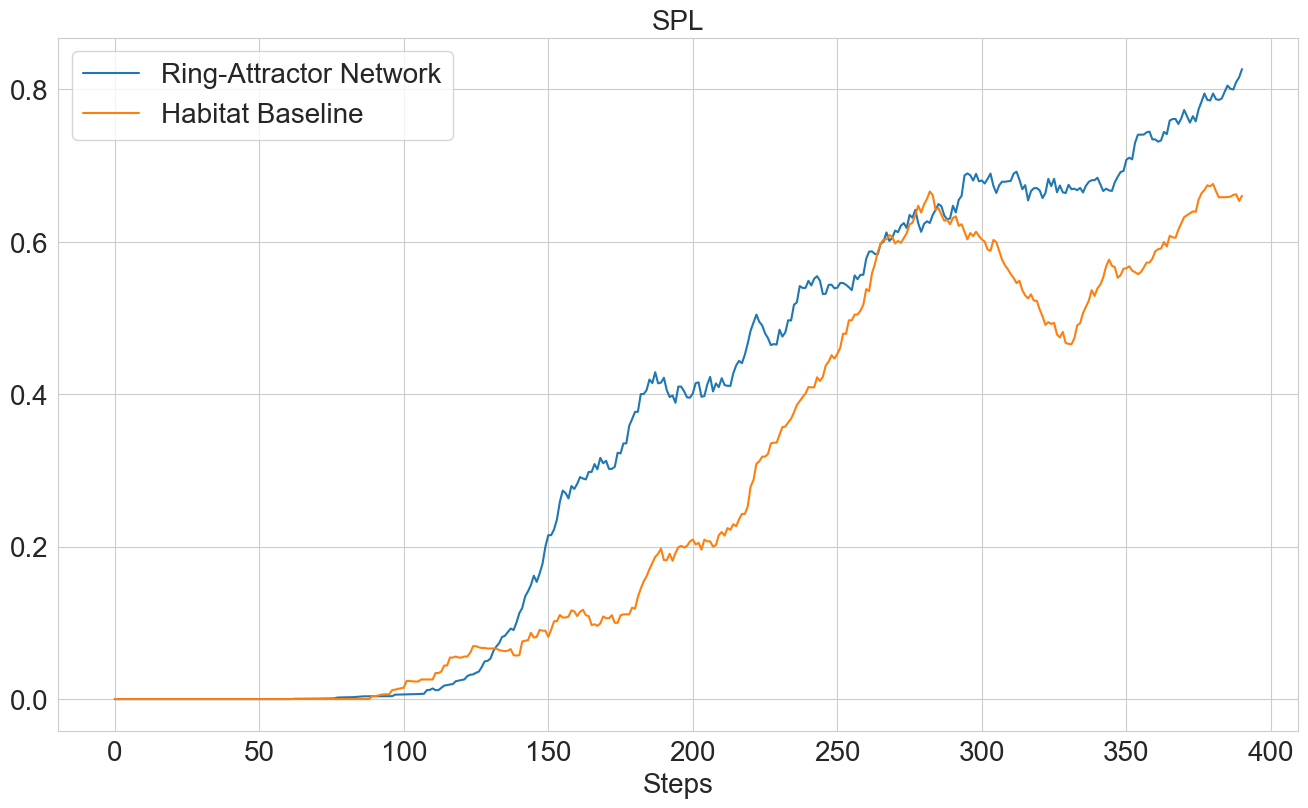

In [15]:
plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/spl'])
plt.plot(ppo_logs_2['metrics/spl'])

plt.title("SPL", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['Ring-Attractor Network', 'Habitat Baseline'], fontsize=20)

### **RAN vs Baseline - PointGoal GPS/Compass Included - Edgemere Scene**

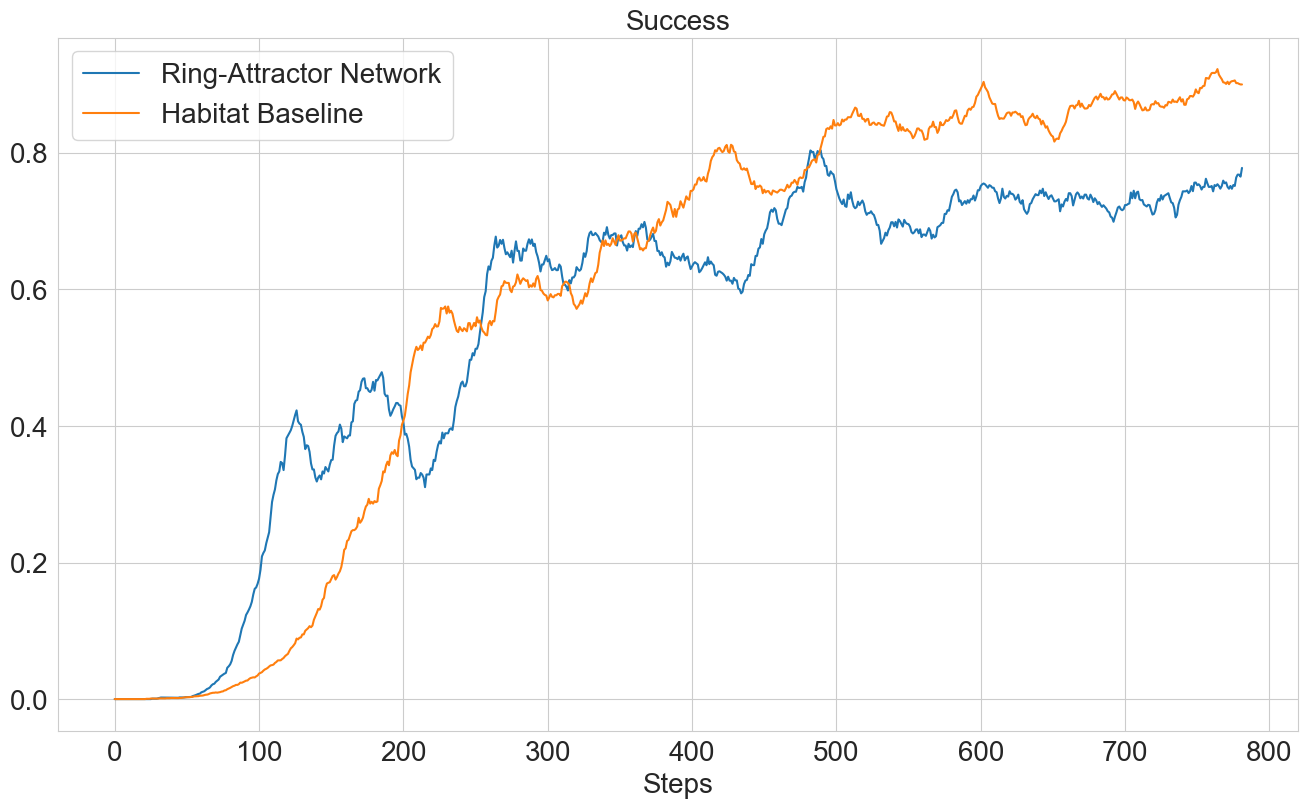

In [18]:
import matplotlib.pyplot as plt

ppo_logs_1 = parse_tensorboard("experiment_tensorboards/Edgemere_GCN_200000/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])
ppo_logs_2 = parse_tensorboard("experiment_tensorboards/Edgemere_resnet/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])

plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/success'])
plt.plot(ppo_logs_2['metrics/success'])

plt.title("Success", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['Ring-Attractor Network', 'Habitat Baseline'], fontsize=20)

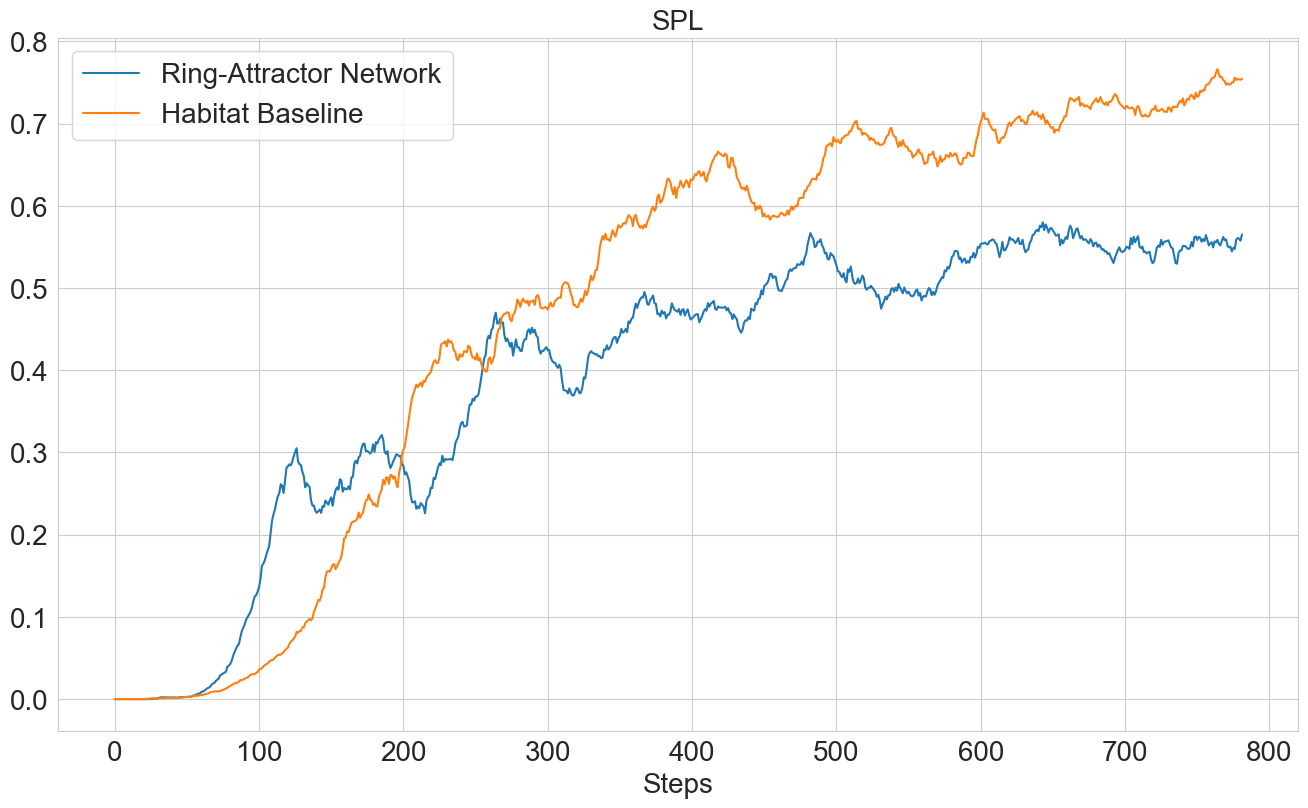

In [19]:
plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/spl'])
plt.plot(ppo_logs_2['metrics/spl'])

plt.title("SPL", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['Ring-Attractor Network', 'Habitat Baseline'], fontsize=20)

### **RAN vs Baseline - No PointGoal GPS/Compass - Object Added at Goal - Empty Room Scene**

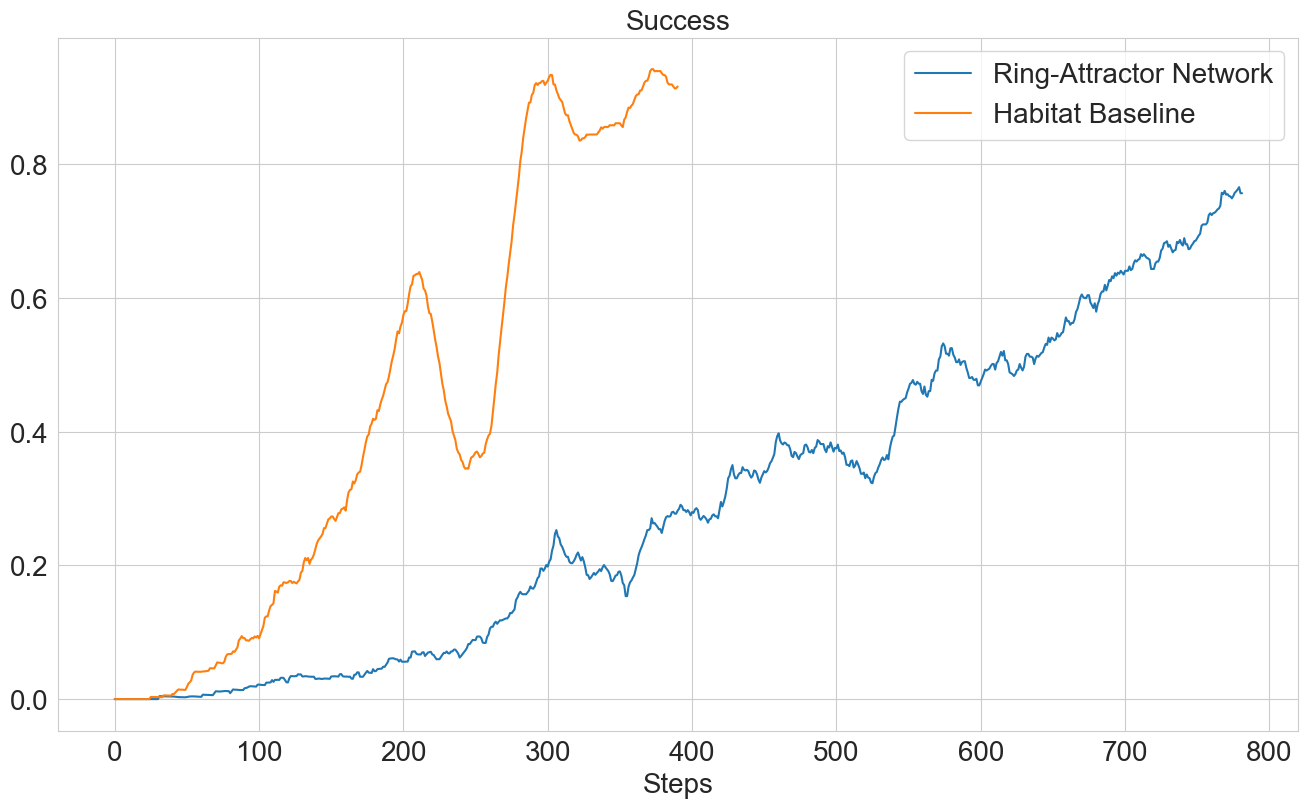

In [22]:
import matplotlib.pyplot as plt

ppo_logs_1 = parse_tensorboard("experiment_tensorboards/ran_visual_only/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])
ppo_logs_2 = parse_tensorboard("experiment_tensorboards/resnet_visual_only/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])

plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/success'])
plt.plot(ppo_logs_2['metrics/success'])

plt.title("Success", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['Ring-Attractor Network', 'Habitat Baseline'], fontsize=20)

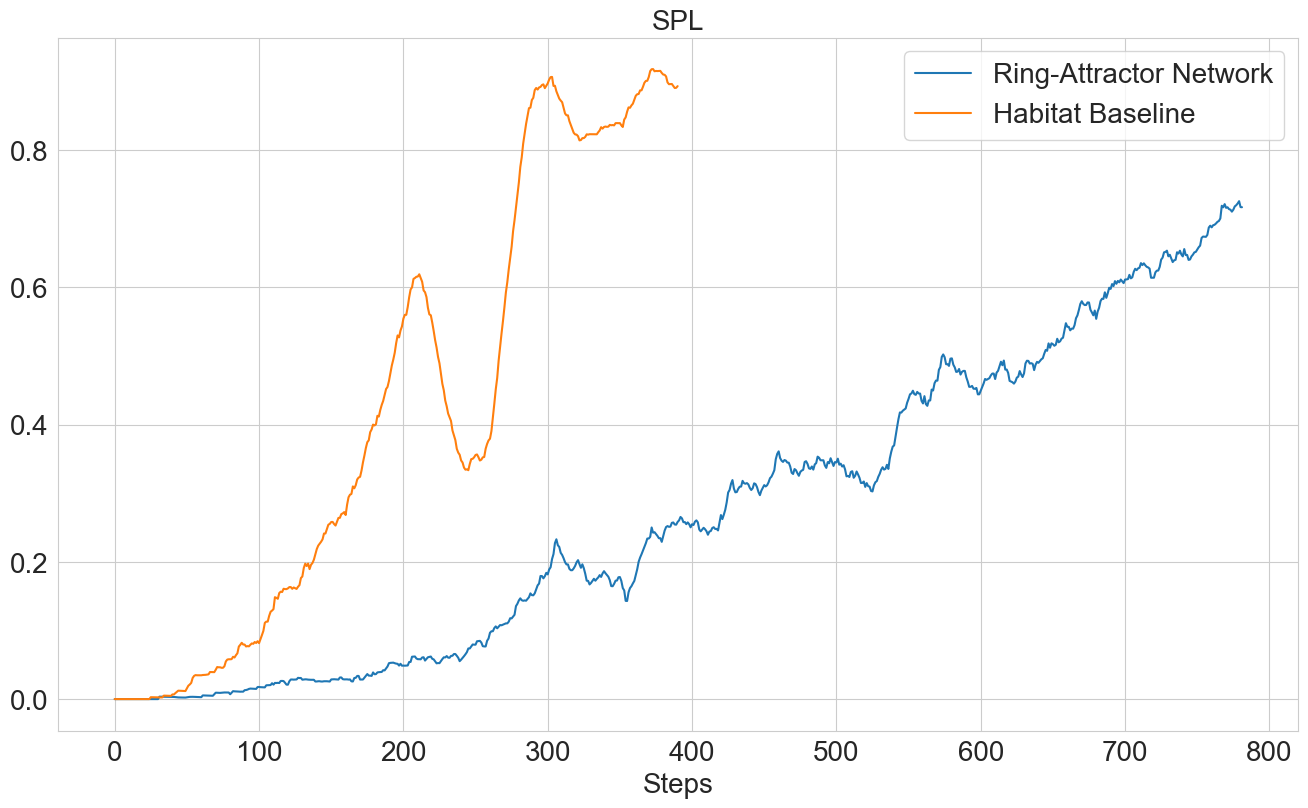

In [23]:
plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/spl'])
plt.plot(ppo_logs_2['metrics/spl'])

plt.title("SPL", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['Ring-Attractor Network', 'Habitat Baseline'], fontsize=20)

### **RAN vs Baseline - No PointGoal GPS/Compass - Object Added at Goal - Edgemere Scene**

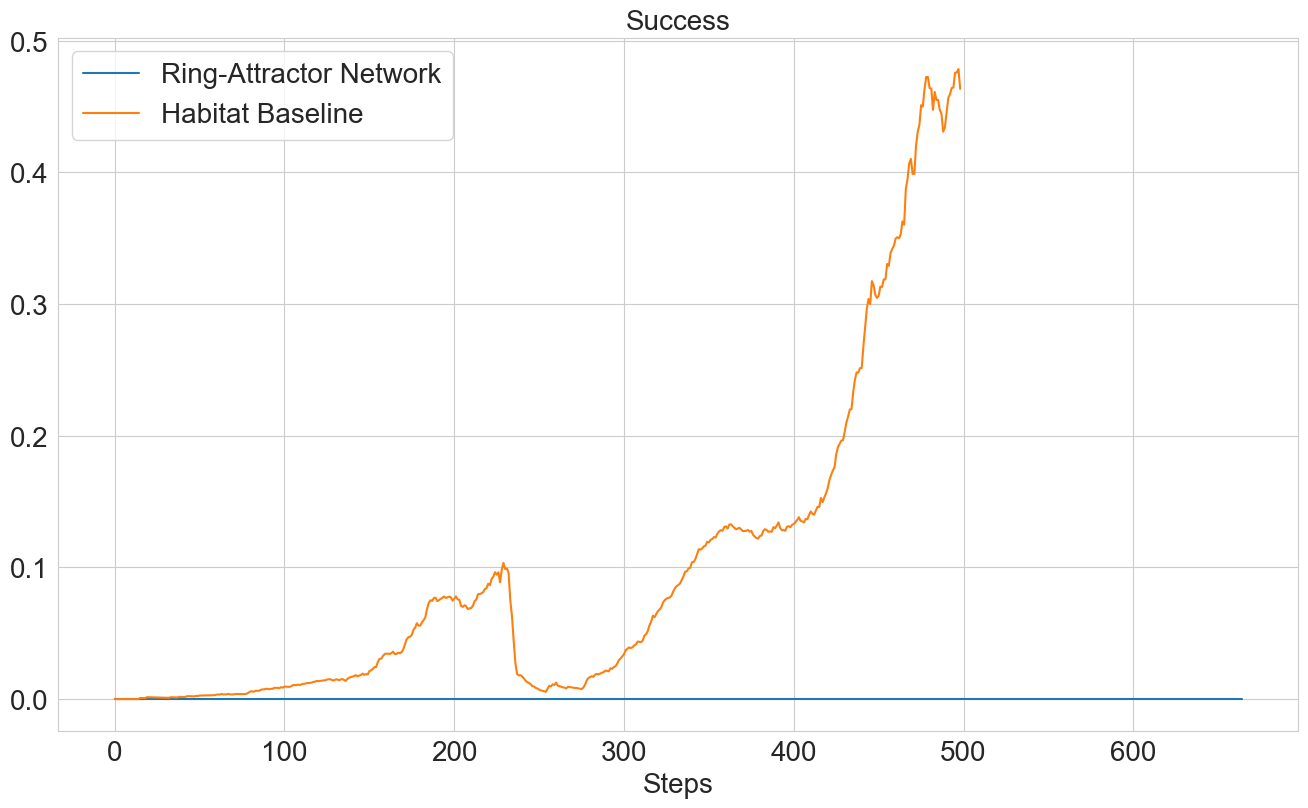

In [25]:
import matplotlib.pyplot as plt

ppo_logs_1 = parse_tensorboard("experiment_tensorboards/ran_visual_only_edgemere/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])
ppo_logs_2 = parse_tensorboard("experiment_tensorboards/resnet_visual_only_edgemere/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])

plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/success'])
plt.plot(ppo_logs_2['metrics/success'])

plt.title("Success", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['Ring-Attractor Network', 'Habitat Baseline'], fontsize=20)

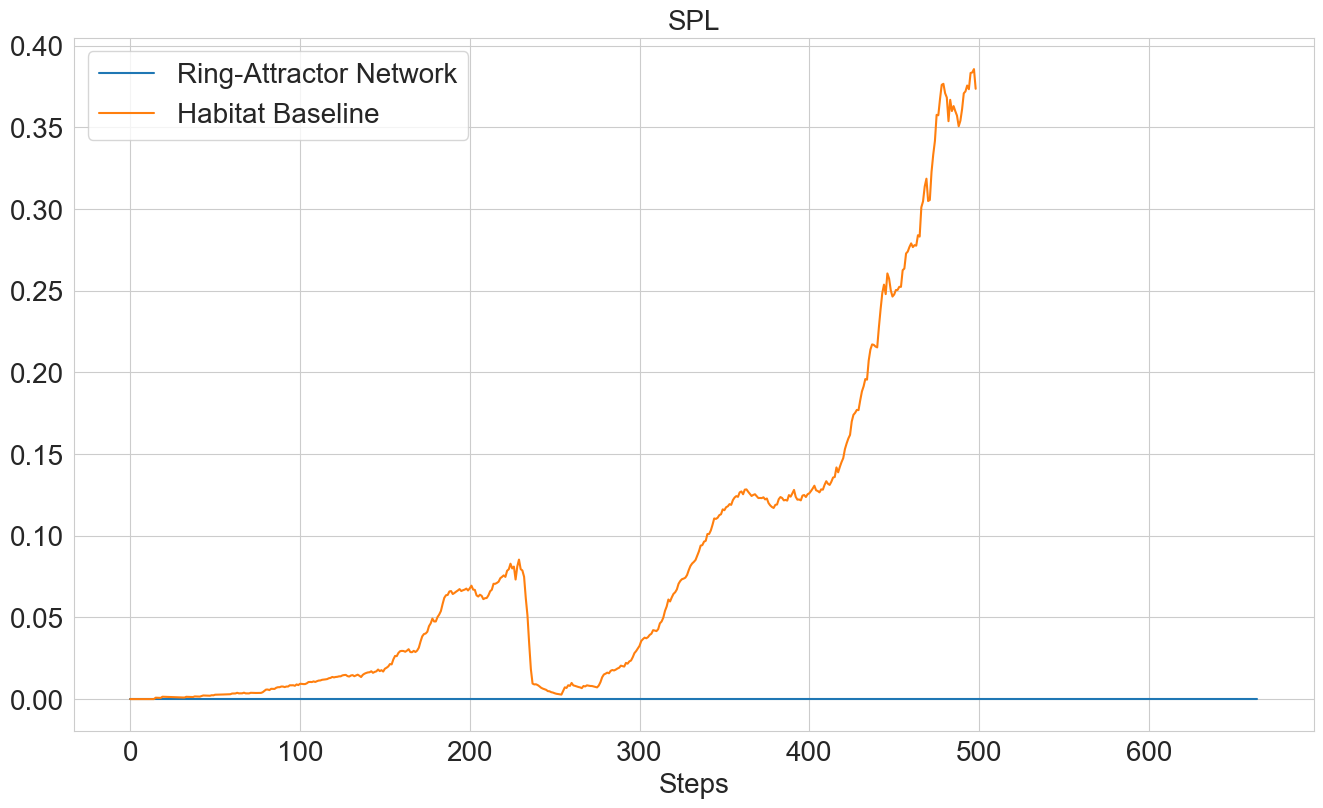

In [26]:
plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/spl'])
plt.plot(ppo_logs_2['metrics/spl'])

plt.title("SPL", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['Ring-Attractor Network', 'Habitat Baseline'], fontsize=20)

### **ViTMAE vs ResNET**

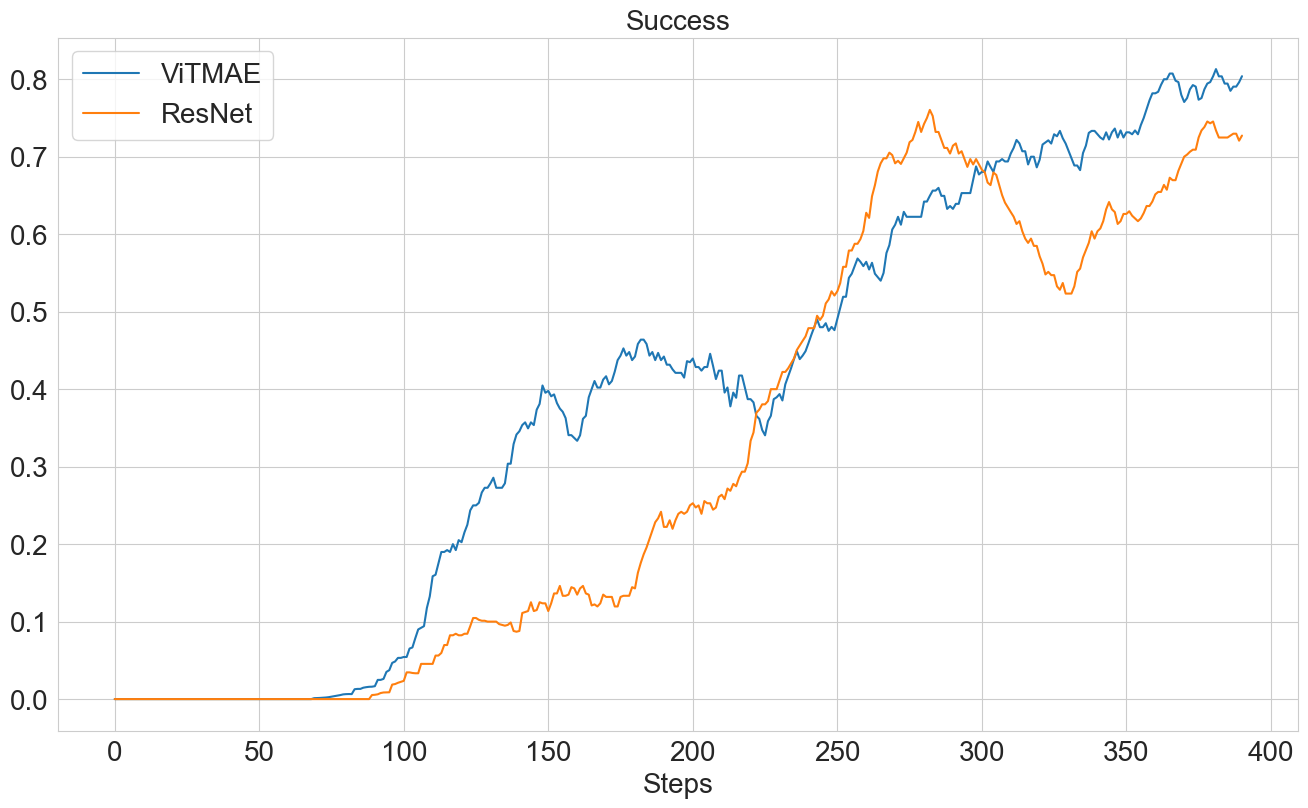

In [27]:
import matplotlib.pyplot as plt

ppo_logs_1 = parse_tensorboard("experiment_tensorboards/baseline_resnet_gps_vitmae/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])
ppo_logs_2 = parse_tensorboard("experiment_tensorboards/baseline_resnet_gps/", ["metrics/spl", "metrics/success", "reward", "learner/grad_norm"])

plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/success'])
plt.plot(ppo_logs_2['metrics/success'])

plt.title("Success", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['ViTMAE', 'ResNet'], fontsize=20)

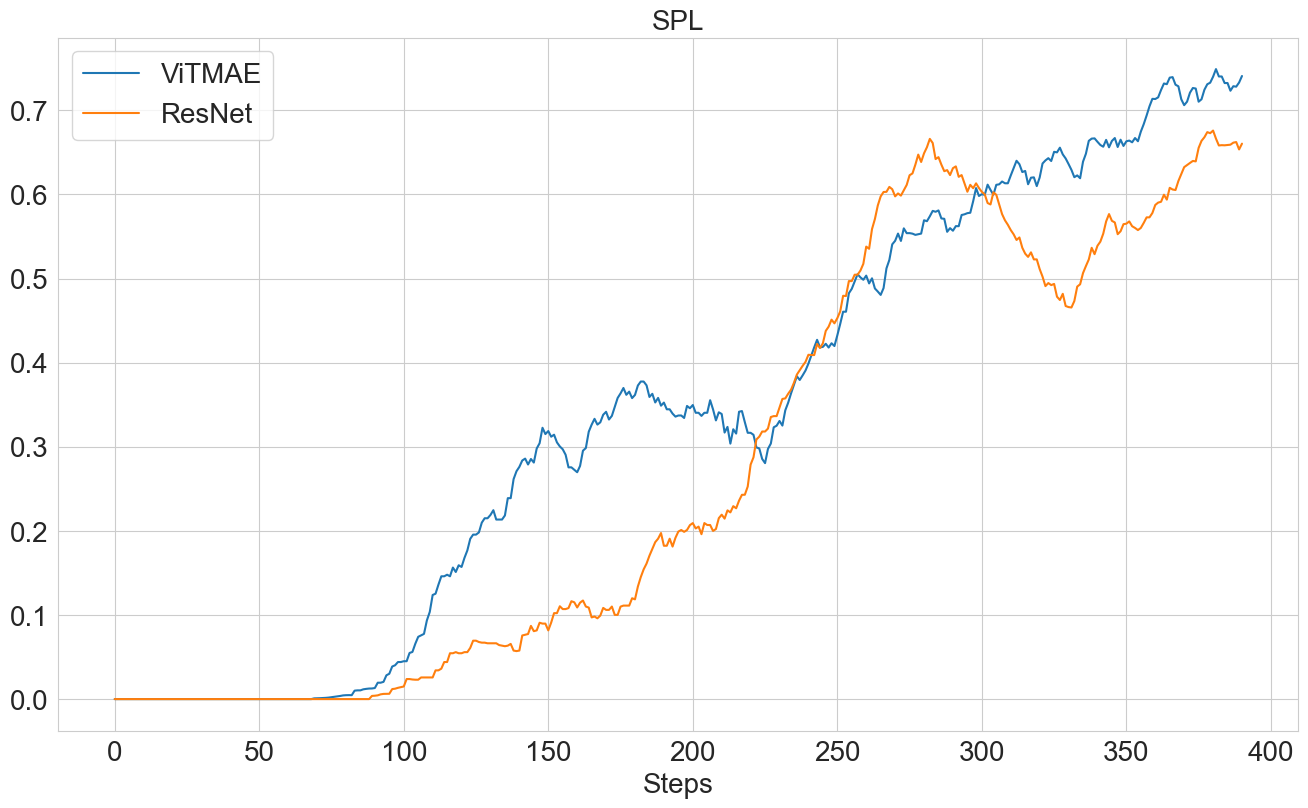

In [28]:
plt.figure(figsize=(16,9))

plt.plot(ppo_logs_1['metrics/spl'])
plt.plot(ppo_logs_2['metrics/spl'])

plt.title("SPL", fontsize=20)
plt.xlabel("Steps", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(labels=['ViTMAE', 'ResNet'], fontsize=20)